# Elliptische Kurven

<div class="alert alert-block alert-danger">
    
<b>Ziel des Notebooks:</b>
- Erarbeitung des ECC-Algorithmus (Elliptische-Kurven-Kryptographie)

<b>Mathematische Tools:</b>
- Elementare Gruppentheorie
- Endliche Körper
</div>

Elliptische Kurven haben eine exponierte Stellung in der Mathematik. Spätestens in den 1990er Jahren, in denen Andrew Wiles den berühmten <i>großen Satz von Fermat</i> mit ihrer Hilfe bewies, zeigte sich die Tragweite der Theorie. Bekannt sind elliptische Kurven aber schon weitaus länger.

### Großer Satz von Fermat
***
<div>
Für $2<n\in\mathbb{N}$ existieren keine ganzzahligen Lösungen $(a,b,c)\in \mathbb{Z}^3$ für die Gleichung $a^n+b^n=c^n$.
</div>

***

Der Fokus dieses Notebooks soll aber auf einer weiteren Anwendung von elliptischen Kurven liegen, die in den Bereich der Kryptographie fällt. Die bis heute gängige Verschlüsselung im Internet basiert auf dem sogenannten [RSA-Verfahren](https://de.wikipedia.org/wiki/RSA-Kryptosystem). Es gibt allerdings ein deutlich effizienteres und dazu sicheres Verfahren Nachrichten zu verschlüsseln, das sogenannte <i>Elliptic Curve Cryptography</i> (ECC) oder zu Deutsch: Elliptische-Kurven-Kryptographie; weshalb aktuell vom RSA-Standard auf ECC-Standard umgestellt wird. Ziel dieses Notbooks ist es, das ECC-Verfahren zu verstehen.

Für diejenigen, die mehr über den Bezug vom Großen Fermatschen Satz zu elliptischen Kurven wissen möchten, sei allerdings auf den folgenden Abschnitt verwiesen, der sich diesem Thema widmet. Alle anderen können den Abschnitt getrost übergehen.

### Andrew Wiles' Beweis des Großen Fermatschen Satzes
***
Die Theorie der elliptischen Kurven scheint eng mit der Theorie von sogenannten <i>elliptischen Modulformen</i> verknüpft zu sein. Das sind Funktionen $f$ auf der oberen Halbeebene (d.h. $f:\mathbb{H}\to\mathbb{H}$, wobei $\mathbb{H}:=\{z\in\mathbb{C}| \Im(z)>0\}$ die Menge der komplexen Zahlen mit positivem Imaginärteil ist), die eine ungeheure Menge an Symmetrien aufweisen. Tatsächlich gibt es nämlich für eine Modulform $f$ ein $k \in \mathbb{Z}$, sodass für jede Matrix $A:=\left(\begin{matrix}
a & b \\
c & d
\end{matrix}\right) \in \mathbb{Z}^{2\times 2}$ mit $det(A)=1$ die Gleichung $f(\frac{az+b}{cz+d})= (cz+d)^kf(z)$ erfüllt ist. Sie finden im Internet viele Bilder und Videos dazu, die diese Symmetrien veranschaulichen. Die Definition von Modulformen fordert außerdem noch komplexe Differenzierbarkeit.

Man vermutet nun, dass man zu jeder elliptischen Kurve $E$ eine Modulform finden kann, die auf spezielle Weise mit $E$ zusammenhängt (Das ist die sogenannte Taniyama-Shimura-Vermutung). Diese Vermutung konnte aber bisher nicht bewiesen werden. Elliptische Kurven, für die man so eine Modulform finden kann, nennt man <i>modular</i>. Die Taniyama-Shimura-Vermutung besagt also, dass alle elliptischen Kurven modular sind.

1990 konnte Kenneth Ribet zeigen: Falls es eine ganzzahlige Lösung der Gleichung $a^n+b^n=c^n$ gibt, dann ist die <i>Frey-Kurve</i> $y^2 = x(x-a^n)(x+b^n)$ eine elliptische Kurve, die nicht modular ist und damit im Widerspruch zur Taniyama-Shimura-Vermutung steht.

Die Arbeit Andrew Wiles' bestand nun darin, dass er für eine große Klasse von elliptischen Kurven (zu denen die besagte Frey-Kurve zählt) zeigen konnte, dass sie modular sind. Der Große Satz von Fermat ist also ein einfaches Korollar seiner Arbeit.
***

Widmen wir uns nun also dem eigentlichen Thema: ECC. Wir starten mit der Definition elliptischer Kurven.

<div class="alert alert-block alert-info">
    
### Definition - Elliptische Kurve

Sei $K$ ein  Körper mit
1. $char(K) \not \in \{2,3\}$ und
2. $a,b\in K$ mit $4a^2-27b^2\not=0$
    
Für das Polynom $p(x,y):=-y^2+x^3+ax+b \in K[x,y]$ nennen wir $\mathcal{V}(p):=\{(x,y)\in\mathbb{R}^2| p(x,y)=0\} \cup \{\mathcal{O}\}$ die elliptische Kurve von $p$ (über $K$). Eine elliptische Kurve ist demnach die Lösungsmenge der Gleichung $y^2=x^3+ax+b$ in $K^2$ vereinigt mit einem "unendlich fernen Punkt" $\mathcal{O}$.
    
<b>Erinnerung</b>:
- $K[x,y] := \{\sum_{i=0}^n\sum_{j=0}^ma_{ij}x^iy^j|a_{ij} \in K; n,m \in \mathbb{N}\}$ bezeichnet den Polynomring in $x$ und $y$. Dabei definieren wir $x^0:=y^0:=1$.
- Die Charakteristik $char(K)$ eines Körpers K ist definiert als der positive Erzeuger des Kerns des Ringhomomorphimus $\varphi: \mathbb{Z} \to K$ mit $\varphi(1):=1$.<br>
D.h. die Charakteristik gibt an wie oft wir $1$ mit sich selbst addieren müssen, bis wir $0$ erhalten, insbesondere gilt: $char(\mathbb{Z}\big/p\mathbb{Z}) = p$ für $p\in \mathbb{Z}$ (positive) Primzahl.
    
<b>Bemerkung</b>: Die Bedingung 1. erlaubt es uns die elliptische Kurve in der einfachen Form hinzuschreiben, in der wir sie angegeben haben. Die zweite Bedingung sorgt dafür, dass die sogenannte <i>Diskriminante</i> der Kurve nicht verschwindet (d.h. ungleich Null ist). Dadurch hat die Kurve "schöne Eigenschaften", z.B. ist dann für $k=\mathbb{R}$ an jedem Punkt die Tangente wohldefiniert. Die Bedingungen sind beide etwas technisch, weshalb wir darauf nicht weiter eingehen wollen.
</div>

Die Definition kann auf den ersten Blick etwas abstrakt wirken. Der Begriff elliptische Kurve wird allerdings stark durch den Fall $K=\mathbb{R}$ motiviert, in dem $\mathcal{V}(p)\setminus\{\mathcal{O}\}$ eine Kurve im analytischen Sinn ist.

<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Parametrisieren Sie die Kurve für $K=\mathbb{R}$ (dabei können Sie den Punkt $\mathcal{O}$ außer Acht lassen).
</div>

Die Lösungsmenge $\mathcal{V}(p)\setminus\{\mathcal{O}\}$ der polynomiellen Gleichung $p(x,y)=0$ lässt sich als Teilmenge des $\mathbb{R}^2$ gut visualisieren.
Führen Sie die zwei Codeblöcke nacheinander aus, um eine Visualisierung der Kurve zu erhalten. Sie können an den zugehörigen Reglern für $a$ und $b$ verschiedene Werte festlegen.

Es ist nicht notwendig, dass Sie den Programmcode verstehen. Sie sollten aber folgende Zeile einmal laufen lassen, damit der Programmcode fehlerfrei funktioniert.

In [13]:
# Achten Sie darauf, dass Sie Python 3 und nicht Julia verwenden 
# FOLGENDE ZEILE BITTE UNBEDINGT EINMAL ZU BEGINN AUSFÜHREN!

In [1]:
pip install plotly

  Using cached plotly-5.18.0-py3-none-any.whl (15.6 MB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


Lassen Sie folgende Zeile einmal laufen, um eine interaktive Visualisierung von elliptischen Kurven zu erhalten.

In [2]:
# ALGORITHMUS 1
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Funktion zur Erstellung des Graphen
def create_implicit_graph(a, b):
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    Z = Y**2 - X**3 - a * X - b

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=[0], colors='r', linewidths=1)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Elliptische Kurven: $y^2 = x^3 + {}x + {}$'.format(a, b))
    plt.grid(True)
    plt.show()

# Interaktive Schieberegler für a und b
interact(create_implicit_graph, a=(-2.0, 1.0, 0.01), b=(-1.0, 2.0, 0.01))


interactive(children=(FloatSlider(value=-0.5, description='a', max=1.0, min=-2.0, step=0.01), FloatSlider(valu…

<function __main__.create_implicit_graph(a, b)>

<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Warum ist die Kurve symmetrisch zur $x$-Achse?
   
</div>

Bisher wirkt der zusätzliche Punkt $\mathcal{O}$ eher störend als nutzbringend. Seine Daseinsberechtigung erörtern wir im Folgenden. Wir werden dabei weitestgehend auf Beweise verzichten, da die Konzepte intuitiv verstanden werden können, die zugehörigen Beweise aber recht technisch sind.

Sei für den Rest des Notebooks $K=\mathbb{Q}$ und  $\mathcal{V}$ eine elliptischen Kurve über $K$.

Dann lässt sich auf $\mathcal{V}$ eine Gruppenstruktur definieren. Diese ist geometrisch motiviert:<br>
Betrachten wir zwei rationale Punkte $P,Q$, so erhalten wir zwischen ihnen eine Gerade (falls $P=Q$ betrachte die Tangente). Falls die Gerade $\mathcal{V}\setminus\{\mathcal{O}\}$ in einem dritten Punkt schneidet, bezeichnen wir diesen Punkt als $R = (r_1,r_2) \in \mathbb{Q}^2$. Falls $R$ existiert, definieren wir $P+Q:=(r_1,-r_2)=:-R$. Andernfalls setzen wir $P+Q:=\mathcal{O}$.

<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Überlegen Sie, wie viele Schnittpunkte eine Gerade mit einer elliptischen Kurve hat. Die Antwort variiert je nach Gerade, können Sie die Abhängigkeit ermitteln?
    
<b>Hinweis</b>: Betrachten Sie den Grad des zugehörigen Polynoms (bzgl. $x$).
</div>

![abc](./elliptic_curve.png)

<div class="alert alert-block alert-success">
    
### 1. Aufgabe
***
- 1.1 Bestimmen Sie anhand einer Skizze zu einem Punkt $P\in\mathcal{V}$ das Inverse und überlegen Sie, warum diese Konstruktion im Allgemeinen möglich ist.
- 1.2 Überlegen Sie sich, warum $\mathcal{O}$ ein Neutralelement bzgl. der Verknüpfung bildet.
- 1.3 Argumentieren Sie, warum die so definierte Verknüpfung kommutativ ist.
    
<b>Hinweis zur 1.1</b>: Betrachten Sie die Vertikale und erinnern Sie sich an die Interpretation von $\mathcal{O}$ als Punkt im Unendlichen.<br>
<b>Bemerkung</b>: Mit der Bearbeitung der 1.2 zeigen Sie also (informell) insbesondere, dass für alle Punkte Inverse existieren.
</div>

Es stellt sich heraus, dass die Verknüpfung assoziativ ist, das heißt $(\mathcal{V},+)$ bildet eine abelsche Gruppe.

<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Machen Sie sich anhand einer Skizze klar, dass die Verknüpfung assoziativ ist.
    
<b>Hinweis</b>: Betrachten Sie drei paarweise verschiedene Punkte $P,Q,R \in \mathcal{V}$ und zeichnen Sie die zugehörigen Geraden ein. Zeichnen Sie nun $P+Q$, $Q+R$ und daraufhin $(P+Q)+R$ und $P+(Q+R)$ ein. Sie werden feststellen, dass die letztgenannten Punkte gleich sind (zumindest, wenn Sie genau genug zeichnen). Überlegen Sie, warum dies im Allgemeinen gilt.
</div>

Die Gruppenstruktur auf elliptischen Kurven eignet sich um eine sogenannte <i>Falltürfunktion</i> zu definieren.

<div class="alert alert-block alert-info">
    
### Definition - Falltürfunktion
***
Der Begriff <b>Falltürfunktion</b> kommt aus der Informatik. Damit bezeichnet man Funktionen $f:\mathbb{A}\to\mathbb{B}$, sodass sich der Funktionswert $y=f(x)$ für gebenes $x\in A$ <i>effizient</i> (d.h. in polynomieller Laufzeit) berechnen lässt. Andersrum soll für gegebenes $y=f(x)\in \mathbb{B}$ der Urbildwert $x$ <i>schwer</i> zu berechnen sein.
    
<b>Bemerkung</b>: Wir werden nicht formal definieren, was dieses <i>schwer</i> bedeutet. Die Schwierigkeit bei der Definition rührt daher, dass man auch <i>probabilistische Algorithmen</i> in Betracht ziehen muss. Das heißt die exakte Berechnung soll nicht nur ineffizient sein (also nicht-polynomieller Laufzeit - z.B. exponentiell), sondern auch "unwahrscheinlich zu erraten" sein.
</div>

Ein bekanntes Beispiel für Falltürfunktionen ist die Produktbildung von Primzahlen. Es ist sehr einfach, zwei Primzahlen zu multiplizieren (Eine Multiplikation entrspricht einem flop, d.h. einer <i>floating point operation</i>, der Einheit in der man Rechenaufwand typischerweise angibt. Insbesondere ist die Laufzeit $\mathcal{O}(1)$, wobei wir die $\mathcal{O}$-Notation verwenden. Nicht zu verwechseln mit unserem "unendlich fernen Punkt" $\mathcal{O}$ auf der elliptischen Kurve).<br>
Um allerdings die Primfaktorzerlegung einer beliebigen Zahl zu finden, wird erheblich mehr Aufwand benötigt (wen genauer interessiert, was "erheblich mehr" bedeutet, der kann dazu [hier](https://en.wikipedia.org/wiki/Integer_factorization#Difficulty_and_complexity) mehr erfahren).<br>
Ein weiterer sehr verbreiteter Algorithmus zur Datenverschlüsselung, das sogenannte [RSA-Kryptosystem](https://de.wikipedia.org/wiki/RSA-Kryptosystem), benutzt genau diese Falltürfunktion.

Man kann die Primfaktorzerlegung einer Zahl aber tatsächlich mithilfe des [Shor-Algortihmus](https://de.wikipedia.org/wiki/Shor-Algorithmus) in polynomieller Laufzeit berechnen. Dieser lässt sich allerdings nur auf Quantencomputern implementieren. Das soll aber hier nicht weiter thematisiert werden.

***

Bevor wir uns der Frage widmen, wie uns Falltürfunktionen dabei helfen Daten zu verschlüsseln, möchten wir einmal herausarbeiten, wie genau die Gruppenstruktur auf der elliptischen Kurve uns solch eine Funktion liefert.

Betrachten Sie dazu für $n \in \mathbb{Z}$ und $P \in \mathcal{V}$ den Punkt $nP=P+...+P$, der als die $n$-fache Addition von $P$ definiert ist. Für festes $P\in E$ erhalten wir nun die Falltürfunktion $f_P:\mathbb{Z} \to \mathcal{V}, (n,P) \mapsto f_P(n):=f(n,P):=nP$

<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Wie kann man $P+P$ geometrisch interpretieren?
    
<b>Hinweis</b>: Betrachten Sie die Tangente im Punkt $P$.
</div>

Um zu zeigen, dass $f$ der Definition einer Falltürfunktion genügt, müssen wir zeigen, dass für gegebenes $n\in\mathbb{Z}$, $P\in \mathcal{V}$ der Funktionswert $f(n,P)$ leicht zu berechnen ist.<br>
Apriori ist der Aufwand linear, d.h. $\mathcal{O}(n)$, denn wir müssen $P$ ja $n$-mal addieren.

Allerdings gibt es einen schnelleren Weg. Betrachte dazu die Binärdarstellung von $n$, sagen wir: $n=35=2^5+2^1+2^0=100011_{2}$. (Wenn wir Zahlen in einer anderen Basis als Basis 10 darstellen, schreiben wir die Basis als Index dazu. Für Binärdarstellungen also Index $2$)<br>
Um Zweierpotenzen $2^kP$, $k\in \mathbb{N}$ von $P$ zu berechnen, müssen wir $P$ nicht $2^k$ mal addieren. Stattdessen addieren wir um $2^kP$ zu berechnen $2^{k-1}P$ mit sich selbst, das heißt wir brauchen lediglich $k$ Schritte für die Berechnung.

#### Berechnung von $2^3P$
<div class="alert alert-block">
    
<u>Schritt 1</u>: &nbsp;&nbsp;&nbsp; $2P=P+P$<br>
<u>Schritt 2</u>: &nbsp;&nbsp;&nbsp; $2^2P=4P=2P+2P$<br>
<u>Schritt 3</u>: &nbsp;&nbsp;&nbsp; $2^3P=8P=4P+4P$<br>
    
</div>

Möchten wir $nP$ berechnen und $n$ ist keine Zweierpotenz, können wir einfach die Binärdarstellung betrachten und die einzelnen Zweierpotenzen addieren. Im Wesentlichen ist die Berechnung also logarithmischer Laufzeit, das heißt für Eingabe $(n,P)$ liegt die Berechnung von $f(n,P)$ in der Größenordnung $\mathcal{O}(log_2(n))$.

Die Umkehrung des Problems wäre nun, für gegebenes $(P,Q=nP) \in \mathcal{V}^2$ dieses $n\in\mathbb{N}$ zu finden, sodass $f(n,P)=Q$.<br>
Dafür bleibt einem aber nicht viel anderes übrig, als die <i>Brute-Force-Methode</i> zu benutzen, also einfach durchzuprobieren. Man muss also nacheinander für jedes $k\in\mathbb{N}$ den Funktionswert $f(k,P)=kP$ berechnen, bis $kP=Q$ gilt (oder zumindest ist kein wesentlich besseres Verfahren bekannt). Die Funktion erfüllt also unsere Definition und ist damit eine Falltürfunktion.
***

Im Folgenden werden wir erklären, wie wir unsere konkrete Falltürfunktion dafür nutzen können Daten zu verschlüsseln. Im Grunde funktioniert das so analog für jede andere Falltürfunktion, siehe dafür [Asymmetrisches Kryptosystem](https://de.wikipedia.org/wiki/Asymmetrisches_Kryptosystem).

Man kann sich leicht überlegen, das verschlüsselte Kommunikation zwischen zwei Parteien $A$ und $B$ schon dann möglich ist, wenn $A$ und $B$ beide eine geheime Zahl kennen, die außer ihnen niemand kennt.

Nehmen wir dazu an, dass Alice und Bob geheime Nachrichten austauschen wollen und gehen wir weiterhin davon aus, dass Sie ihre unverschlüsselten Nachrichten mit $N=26$ Buchstaben schreiben (also dem gängigen Alphabet. Sie können aber auch jedes andere $N>1$ wählen, wenn Sie ihrem Alphabet z.B. Großbuchstaben oder Sonderzeichen hinzufügen wollen).<br>
Wir wollen zeigen, dass Alice und Bob schon dann geheim kommunizieren können, wenn Sie eine gemeinsame Zahl $z\in\mathbb{Z}$ kennen, die sonst niemand kennt.

<div class="alert alert-block alert-info">
Solch eine Zahl, die nur Alice und Bob kennen, bezeichnet man auch als <b>(gemeinsamen) Schlüssel</b>.
</div>

Sei also $z$ ein Schlüssel.

Betrachten wir nun die Menge $S_\mathbb{A}:=\{\varphi:\mathbb{A}\to \mathbb{A}| \varphi \text{ ist bijektiv}\}$ der Permutationen auf unserem Alphabet $\mathbb{A}$. Das ist gerade isomorph zur $S_N=\{\varphi:\{1,...,N\} \to \{1,...,N\}| \varphi \text{ ist bijektiv}\}$, da nach Voraussetzung gilt $|\mathbb{A}|=N$ und wir demnach $\mathbb{A}$ mit $\{1,...,N\}$ identifizieren können.<br>
Aus der linearen Algebra ist bekannt, dass $N!=|S_N|=|S_\mathbb{A}|$. Wir können die $S_\mathbb{A}$ also durchnummerieren. Sei $\varphi_i$ für $i\leq N!$ die $i$-te Permutation auf $\mathbb{A}$ bezüglich dieser Nummerierung.

Nun kommen wir zur eigentlichen Idee zur Verschlüsselung. Betrachten wir die Zahl $\bar{z}:= z \text{ mod } N! \in \mathbb{Z}\big/N!\mathbb{Z}$, dann gibt es einen Repräsentanten $R$ von $\bar{z}$ in $\{1,...,N!\}$. Die Verschlüsselung besteht nun darin, dass Alice auf ihre Nachricht $\varphi_R$ anwendet (was das genau bedeutet diskutieren wir gleich), bevor Sie sie abschickt. Bob muss dann bevor er die Nachricht liest nur $\varphi_R^{-1}$ auf die Nachricht anwenden, dadurch wird der Text wieder lesbar.

Mit der Anwendung eines Elements aus $S_\mathbb{A}$ auf eine Nachricht ist Folgendes gemeint:<br>
Eine Nachricht $T$ von Alice ist ein String von Zeichen. Ist unser Alphabet $\mathbb{A}=\{A,k,u\}$ hat $T$ also zum Beispiel folgende Form: $T=Akku$<br>
Die Anwendung von $\varphi\in S_\mathbb{A}$ auf $T$ ist nun nichts anderes als die Anwendung auf die einzelnen Buchstaben. Sei beispielsweise $\varphi(A):=k,\ \varphi(u):=u, \ \varphi(k):=A$, dann ist $\varphi(T):=\varphi(A)\varphi(k)\varphi(k)\varphi(u)=kAAu$.

Für die Praxis ist dieser Algorithmus natürlich viel zu simpel. Außerdem müsste man noch viele Details beachten, wie zum Beispiel, dass eine Verschlüsselung mit der Identiät $id\in S_\mathbb{A}$ natürlich wenig Sinn macht. Aber dieses Beispiel zeigt eben, dass es ausreicht, eine Zahl zu kennen, um verschlüsselt zu kommunizieren. Wir konnten unser Problem verschlüsselt zu kommunizieren also auf Generierung eines gemeinsamen Schlüssels reduzieren. Sobald Alice und Bob das können, können sie ihr Nachrichten ver- & entschlüsseln.

<div class="alert alert-block alert-success">
    
### 2. Aufgabe
***
Denken Sie sich nun selbst ein Verfahren aus mit dem Alice und Bob ihre Nachrichten ver- und entschlüsseln können, wenn sie einen gemeinsamen Schlüssel haben.
    
<b>Hinweis</b>: Sie dürfen sich dabei auf Nachrichten fixer Länge beschränken. Das heißt für gegebenes $L\in\mathbb{N}$ sollen Sie ein Verfahren konstruieren, dass Nachrichten der Länge $L$, also mit $L$ Buchstaben, ver- und entschlüsseln kann.
</div>

Wir geben nun ein Verfahren an, wie sich Alice und Bob mithilfe der elliptischen Kurven einen gemeinsamen Schlüssel generieren können.<br>
Dazu wähle sich Alice eine beliebige Zahl $A\in\mathbb{Z}$. Analog wähle Bob eine Zahl $B\in\mathbb{Z}$. Dies können Sie natürlich im Geheimen tun, sodass niemand ausßer Alice $A$ und niemand außer Bob $B$ kennt.<br>
Alice und Bob einigen sich nun öffentlich auf eine elliptische Kurve $E$, d.h. sie legen die Koeffizienten $a,b$ des Polynoms $-y^2+x^3+ax+b$ fest. Außerdem einigen sie sich auf einen Punkt $P\in E$ auf der elliptischen Kurve $E$ und eine Zahl $n\in \mathbb{Z}$.<br>
Über die Informationen $n,a,b$ und $P$ verfügt also theoretisch auch jeder Dritte, der Alice und Bobs Gespräch abhören möchte, nennen wir ihn Claus.

<div class="alert alert-block alert-info">
    
Unter einer <b>öffentlichen</b> Einigung verstehen wir ein unverschlüsseltes Gespräch, welches theoretisch von Dritten mitgehört werden kann.<br>
Analog sprechen wir von <b>geheimen</b> Prozessen, wenn keine Drittparteien auf die Informationen, um die es in dem Prozess geht, zugreifen können.
    
<b>Bemerkung</b>: Das heißt öffentlich ist das, von dem Claus weiß und geheim ist das, von dem Claus nichts weiß.
    
</div>

Nun kann sich Alice einen sogenannten <i>öffentlichen Schlüssel</i> generieren. Das ist nämlich gerade $f_P(A)=AP$. Analog verfügt Bob über einen eigenen öffentlichen Schlüssel $f_P(B)$. Diese öffentlichen Schlüssel tauschen Alice und Bob nun öffentlich (wie der Name schon vermuten lässt) aus. Claus kennt die öffentlichen Schlüssel also auch.<br>

Wir haben bereits geklärt, dass $(\mathcal{V},+)$ kommutativ ist. Insbesondere gilt also $P\in \mathcal{V}$ und folgende Gleichheit: $f_{AP}(B) =B(AP)= (BA)P=(AB)P=A(BP)=f_{BP}(A)$. 

<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Warum gelten die einzelnen Gleichheiten?
</div>

Nach dieser Überlegung kennen also sowohl Alice als auch Bob den Punkt $ABP\in E$. Claus braucht allerdings für die Berechnung von $ABP$ noch die Zahl $A$ oder $B$. Da $f$ aber eine Falltürfunktion ist, benötigt er unverhältnismäßig viel Aufwand, um $A$ oder $B$ und damit $ABP$ zu berechnen. $ABP$ führt uns aber unmittelbar zu einer (rationalen) Zahl $x$, der $x$-Koordinate von $ABP$, die Alice und Bob als gemeinsamen Schlüssel verwenden können.

Natürlich können sich Dritte den Schlüssel theoretisch trotzdem generieren, aber in der Praxis wird der Zusatzaufwand, den dieser Dritte hat, einfach so skaliert, dass sich der Aufwand nicht rechnet. Häufig sind wirtschaftliche Interessen die Motivation für Datendiebstahl, aber wenn die Kosten um die Verschlüsselung zu knacken höher sind als die Erlöse, die etwa durch Datenverkauf entstehen, dann wird niemand ernsthaft daran interessiert sein diesen Deal einzugehen.

***

Grundsätzlich wären wir an dieser Stelle fertig. Wir haben unseren gemeinsamen Schlüssel $x$ gefunden (dieser ist zwar rational, aber wenn ein ganzzahliger Schlüssel erwünscht ist, können wir natürlich einfach mit dem Nenner multiplizieren), Alice und Bob können sich also ungestört Nachrichten hin- & herschicken.<br>
Allerdings findet die Berechnung von den Funktionswerten von $f$ natürlich auf einem Computer statt, auf dem auch Rundungsfehler auftreten können. Auch wenn diese Rundungsfehler klein sind, führt das natürlich zu einem anderen Schlüssel und wenn Bob mit dem vermeintlich gemeinsamen Schlüssel versucht Alices Nachricht zu entschlüsseln, wird ihm das wohl kaum gelingen. Glücklicherweise gibt es eine äußerst elegante Methode diesen Fall zu umgehen.

Anstatt die rationalen Zahlen als Grundkörper zu betrachten, nehmen wir einen endlichen Grundkörper $\mathbb{F}_p=\mathbb{Z}\big/p\mathbb{Z}$ (wobei $p\in\mathbb{N}$ eine Primzahl ist) und betrachten eine elliptische Kurve über diesem Körper. Erstaunlicherweise liegt auch hier eine Gruppenstruktur vor.

# Exkurs zur Ringtheorie
***

In der linearen Algebra haben Sie bereits bewiesen, dass $\mathbb{F}_p$ ein Körper ist. In diesem Exkurs wollen wir noch einmal genauer verstehen welche Eigenschaften von $\mathbb{Z}$ und welche Eigenschaften der Primzahlen für diesen Umstand sorgen. Dafür machen wir uns einige wichtige Konzepte aus der Ringtheorie klar.

<div class="alert alert-block alert-info">
    
### Definition - Ring
***
Sei $(R,+)$ eine abelsche Gruppe. $(R,+,\cdot)$ heißt Ring, falls $\cdot: R\times R \to R$ assoziativ ist und das Distributivgesetz erfüllt, d.h. $(a+b)\cdot c=a \cdot c + b\cdot c \ \forall a,b,c\in R$.<br>
"$+$" wird als Addition und "$\cdot$" wird als Multiplikation bezeichnet.

Wir nennen $1$ ein <b>Einselement</b>, wenn $1\cdot a=a=a\cdot 1 \  \forall a \in R$.<br>
$R$ heißt <b>kommutativ</b>, falls $a\cdot b = b\cdot a \ \forall a,b\in R$.
    
Einen kommutativen Ring mit Einselement nennen wir <b>Kring</b>.
 
Sei nun $(R,+,\cdot)$  ein Kring. Dann bezeichnen wir mit $R^\times:=\{a\in R|\ \exists \ a^{-1}\in R: a\cdot a^{-1}=1\}$ die <b>Einheitengruppe</b> des Krings. Elemente der Einheitengruppe heißen <b>Einheiten</b>.<br>
Elemente $n \in R\setminus \{0\}$ heißt <b>Nullteiler</b>, falls ein $k\in R$ mit $k\cdot n=0$ existiert.<br>
Wenn kein Nullteiler $n \in R\setminus \{0\}$ existiert, dann nennen wir $R$ <b>nullteilerfrei</b>.
    
Nullteilerfreie Kringe heißen <b>Integritätsbereiche</b>.
    
</div>


<div class="alert alert-block alert-warning">
<b>Denkanstoß</b>: Überlegen Sie sich, dass das Einselement in Kringen eindeutig ist und, dass die Einheitengruppe eine Gruppe bzgl. der Multiplikation ist.
</div>

<div class="alert alert-block alert-info">
    
### Definition - Ideal
***
Sei $(R,+,\cdot)$ ein Kring.<br>
Dann schreiben wir für zwei Mengen $I,J \subseteq R$ $I\cdot J:= \{i*j | i\in I, j\in J\}$. Ist $I=\{i\}$ einelementig, schreiben wir auch $iJ$, analog schreiben wir $I\cdot j$ für $J=\{j\}$ einelementig.
    
Eine Untergruppe $I\subseteq R$ heißt Ideal in $R$ oder auch $R$-Ideal, falls $R\cdot I\subseteq I$.  Wenn immer wir $I \unlhd R$ schreiben, so meinen wir $I$ ist Ideal in $R$.<br>
Gilt sogar $I\subset R$, so nennen wir $I$ <b>echtes</b> Ideal. Dabei bezeichnet "$\subset$" hier und fortan die echte Teilmengenrelation.

Ist $I\unlhd R$ ein Ideal, so ist $R\big/I$ ebenfalls ein Ring.

</div>


Wir gehen zunächst näher darauf ein, was es heißt eine Primzahl zu sein und klären dabei einen weiteren wichtigen Begriff der Ringtheorie.

<div class="alert alert-block alert-info">
    
### Definition - Prim und Irreduzibel
***
Sei $(R,+,\cdot)$ ein Kring.<br>
Für $a,b\in R$ schreiben wir $a|b$ (gesprochen "$a$ teilt $b$"), falls $R\cdot b \subseteq R\cdot a$.
    
Ein Kringelement $p\in R$ heißt <b>irreduzibel</b>, falls $p$ keine Einheit ist und aus $p=ab$ mit $a,b\in R$ folgt, dass $b$ oder $c$ eine Einheit ist.<br>
Man nennt $p \in R$ <b>prim</b>, falls aus $ab|p$ folgt, dass einer der Faktoren $p$ teilt, das heißt es gilt: $a|p \lor b|p$.

Für $I, J \unlhd R$, schreiben wir $I|J$ (gesprochen "$I$ teilt $J$"), falls $J \subseteq I$.
Ein $R$-Ideal $\mathscr{p}$ heißt <b>Primideal</b>, falls für $\mathscr{a,b}\unlhd R$ aus $\mathscr{a}\mathscr{b}:=(\mathscr{a}\cdot\mathscr{b})|\mathscr{p}$ folgt, dass einer der Faktoren $\mathscr{p}$ teilt, wenn also $\mathscr{a}|\mathscr{p}$ oder $\mathscr{b}|\mathscr{p}$ gilt.<br>
Man nennt $\mathscr{m}\unlhd R$ <b>Maximalideal</b>, falls es kein echtes Ideal gibt, das echte Obermenge von $\mathscr{m}$ ist. Das heißt aus $\mathscr{m}\subset I \unlhd R$ folgt $I=R$.

<b>Bemerkung</b>: Sie rechnen schnell nach, dass $R\cdot x$ für alle $x\in R$ ein Ideal in $R$ ist. Insbesondere ist $R\cdot e=R \ \forall e\in R^\times$. 
</div>

<div class="alert alert-block alert-info">
    
### Definition - Hauptidealring
***
Sie $(R,+,\cdot)$ ein Kring.

Dann heißt $I\unlhd R$ <b>Hauptideal</b>, falls $I=R\cdot a$ für ein $a\in R$. Wir schreiben auch $(a):=R\cdot a$, wenn aus dem Kontext klar ist, in welchem Kring wir sind.<br>
Ist jedes Ideal aus $R$ ein Hauptideal, so nennen wir $R$ einen <b>Hauptidealring</b>.
</div>

<div class="alert alert-block alert-success">
    
### 3. Aufgabe
***
Sei $(R,+,\cdot)$ ein Kring.
- 3.1 Zeigen Sie, dass Primideale Maximalideale sind, falls $R$ Hauptidealring ist.
- 3.2 Zeigen Sie, dass die Primzahlen in $\mathbb{Z}$ sowohl irreduzibel als auch prim sind.
- 3.3 Zeigen Sie, dass $(p)$ für $p\in \mathbb{Z}$ prim ein Prim- und damit Maximalideal ist.
- 3.4 Zeigen Sie, dass $R\big/I$ für $I\unlhd R$ Primideal ein Integritätsbereich ist.
- 3.5 Zeigen Sie, dass $R\big/I$ für $I\unlhd R$ Maximalideal ein Körper ist.
    
<b>Hinweis</b>: Besinnen Sie sich auf Aussagen der linearen Algebra zurück und recherechieren Sie gegebenenfalls.
<b>Bemerkung</b>: Sie dürfen ohne Beweis verwenden, dass Maximalideale prim sind.
</div>

***

Der folgende Codeblock generiert Ihnen bei Ausführung ein Beispiel einer elliptischen Kurve über einem endlichen Körper ($a=2, \ b=3, \ p=19$). Sie können gerne eigene Zahlenbeispiele eingeben und sich ansehen, wie die Kurve dann aussieht. Beachten Sie, dass $p$ eine Primzahl sein muss. Im Code ist markiert, wo sie die zugehörigen Werte ändern können. Sie brauchen den restlichen Programmcode nicht zu verstehen.

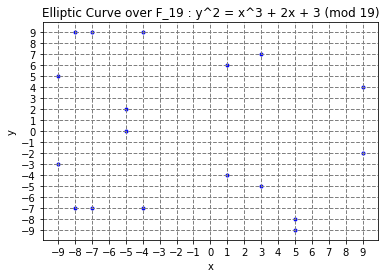

In [5]:
# ALGORITHMUS 2
import matplotlib.pyplot as plt
import numpy as np

def legendre_symbol(a, p):
    return pow(a, (p - 1) // 2, p)

def plot_elliptic_curve(a, b, p):
    x_vals = []
    y_vals = []

    for x in range(-((p-1)//2), (p-1)//2 + 1):  # Symmetrisches Zahlensystem um die Null
        y_squared = (x**3 + a * x + b) % p
        if legendre_symbol(y_squared, p) == 1:
            y = pow(y_squared, (p + 1) // 4, p)
            x_vals.extend([x, x])
            y_vals.extend([y, p - y])

    # Umrechnung der y-Koordinaten
    y_vals = [(y - (p-1)//2) % p - (p-1)//2 for y in y_vals]

    # Hinzufügen des neutralen Elements (unendlich)
    x_vals.append(float('inf'))
    y_vals.append(float('inf'))

    # Gitter hinzufügen
    plt.grid(True, linewidth=1, linestyle='--', color='gray')

    # Ganzzahlige Tick-Abstände für x- und y-Achse
    plt.xticks(np.arange(-((p-1)//2), (p-1)//2 + 1, 1))
    plt.yticks(np.arange(-((p-1)//2), (p-1)//2 + 1, 1))

    plt.scatter(x_vals, y_vals, marker='.', color='b')
    plt.title(f'Elliptic Curve over F_{p} : y^2 = x^3 + {a}x + {b} (mod {p})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Geben Sie hier ihre eigenen Zahlenwerte ein!
a = 2
b = 3
p = 19

# Elliptische Kurve plotten
plot_elliptic_curve(a, b, p)


Auch hier gilt noch die geometrisch motivierte Definition der Verknüpfung. Sie können eine Gerade durch zwei Punkte $P$ und $Q$ zeichnen und den dritten Schnittpunkt an der $x$-Achse spiegeln. Sollten sie an den oberen Rand der Graphik stoßen, bevor sie den dritten Schnittpunkt treffen, können Sie einfach den aktuellen $x$-Wert beibehalten und unten weitermachen. Analog machen Sie links weiter, wenn sie an den rechten Rand treffen (im Prinzip genauso wie bei Pacman).

<div class="alert alert-block alert-success">
    
### 4. Aufgabe
***
    
- 4.1 Wählen Sie gewisse $a,b,p$ und berechnen Sie mit dem gegebenen Algorithmus die Lösungsmenge der Polynomgleichung $y^2=x^3+ax+b$ über dem endlichen Körper $\mathbb{F}_p$.
- 4.2 Zeichnen Sie den Graphen und wählen Sie zwei Punkte $P,Q$, die die Gleichung lösen (und nicht übereinander liegen). Zeichnen Sie $P+Q$ ein.
- 4.3 Zeigen Sie,  dass ganzzahlige Lösungen der Polynomgleichungen auch Lösungen modulo $p$ sind.
</div>

Der Vorteil dabei mit endlichen Körpern zu arbeiten, liegt darin, dass die Berechnungen exakt durchgeführt werden können. Um eine Zahl aus $\mathbb{F}_p$ zu speichern braucht man höchstens so viele Bits wie zum Speichern von $p$ selbst. Rationale Zahlen hingegen benötigen jeweils nur endlich viel Speicherplatz, aber für jeden vorgegebenen Speicherplatz gibt es eine rationale Zahl, die mehr Speicher benötigen. Runden ist daher praktisch unvermeidbar.

<div class="alert alert-block alert-danger">
    
### Rückblick-Aufgabe
***
Suchen Sie sich, wenn möglich, einen (oder zwei) Partner. Sie und ihr Partner nehmen nun die Rolle von Alice und Bob ein.<br>
Verfassen Sie eine kurze Nachricht und verschlüsseln Sie diese mit dem ECC-Algorithmus und der von Ihnen entwickelten Methode aus Aufgabe 2. Lassen Sie Ihren Partner die Nachricht entschlüsseln.<br>
Kehren Sie die Rollen nun um und entschlüsseln Sie die Nachricht Ihres Partners.
    
Sollten Sie zu dritt sein, übernimmt eine Person die Rolle von Claus. Ihre Aufgabe ist es die Nachrichten von Alice und Bob zu entschlüsseln — im Idealfall schafft sie es natürlich nicht. Claus muss die Aufgabe also nicht beenden, sondern kann nach hinreichend vielen Bemühungen aufgeben.
    
<b>Hinweis</b>: Verwenden Sie für die Berechnung der $x$-Koordinate von $nP$ den unten stehenden Algorithmus 3. Die Parameter legen Sie im dafür vorgesehenen Code-Abschnitt fest (siehe Kommentierung).<br>
<b>Bemerkung</b>: Der Code ist ausführlich kommentiert, Sie brauchen die programmiertechnischen Details nicht zu verstehen, aber Sie sollten in der Lage sein einen Menschen anzuweisen, wie man die Berechnungen durchführt. Der Code ist ebenfalls in Python und nicht in Julia geschrieben.
 


In [3]:
# ALGORITHMUS 3
def add_points(p, a, b, P, Q):
    # Funktion zum Addieren von zwei Punkten P und Q auf der elliptischen Kurve
    # Rückgabe ist der resultierende Punkt R

    # Spezialfall: P ist der neutrale Punkt (Unendlich)
    if P is None:
        return Q
    # Spezialfall: Q ist der neutrale Punkt (Unendlich)
    if Q is None:
        return P

    x_p, y_p = P
    x_q, y_q = Q

    # Fall 1: P = -Q
    if P == (x_q, -y_q % p):
        return None  # Ergebnis ist der neutrale Punkt (Unendlich)

    # Fall 2: P = Q
    if P == Q:
        m = (3 * x_p**2 + a) * pow(2 * y_p, -1, p) % p
    # Fall 3: P ≠ Q
    else:
        m = (y_q - y_p) * pow(x_q - x_p, -1, p) % p

    x_r = (m**2 - x_p - x_q) % p
    y_r = (m * (x_p - x_r) - y_p) % p

    return (x_r, y_r)

def multiply_point(p, a, b, P, n):
    # Funktion zum Multiplizieren eines Punktes P mit einer ganzen Zahl n
    # Rückgabe ist der resultierende Punkt nP

    R = None
    current_power_of_two = P

    # Schleife über die Binärdarstellung von n
    for bit in bin(n)[2:]:
        if bit == '1':
            R = add_points(p, a, b, R, current_power_of_two)

        # Verdopple den aktuellen Punkt
        current_power_of_two = add_points(p, a, b, current_power_of_two, current_power_of_two)

    return R

# LEGEN SIE HIER DIE VON IHNEN GEWÜNSCHTEN PARAMETER FEST -------------------------------------------------------------------------------
p = 23  # Primzahl für den endlichen Körper F_p
a = 1   # Koeffizient a der elliptischen Kurve
b = 1   # Koeffizient b der elliptischen Kurve

# Beachten Sie, dass P eine Lösung der Polynomgleich y^2=x^3+ax+b sein muss - vergewissern Sie sich mit Algorithmus 2, dass dies der Fall ist
P = (5, 7)  # Ausgangspunkt auf der elliptischen Kurve 
n = 8   # Ganze Zahl

result = multiply_point(p, a, b, P, n)
print(f"Die x-Koordinate von {n}P ist {result[0] % p}")


Die x-Koordinate von 8P ist 5


### Literaturverzeichnis
- Integer factorization (2023). In <i>Wikipedia, Die freie Enzyklopädie.</i> https://de.wikipedia.org
- Shor Algorithmus (2023). In <i>Wikipedia, Die freie Enzyklopädie.</i> https://de.wikipedia.org
- RSA-Kryptosystem (2023). In <i>Wikipedia, Die freie Enzyklopädie.</i> https://de.wikipedia.org
- Asymmetrisches Kryptosystem (2023). In <i>Wikipedia, Die freie Enzyklopädie.</i> https://de.wikipedia.org

